In [41]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
import random
import re
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, recall_score,roc_auc_score, precision_score, accuracy_score
from sklearn import preprocessing

In [3]:
data = pd.read_csv('./final_data/final_data.csv')
print(data.shape)
data.columns

(84432, 44)


Index(['race', 'gender', 'age', 'admission_type_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'acetohexamide',
       'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone',
       'rosiglitazone', 'acarbose', 'miglitol', 'citoglipton', 'insulin',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'target', 'self_pay',
       'medicaid/medicare', 'coverByInsurance', 'f_diag', 's_diag', 't_diag',
       'clustering3', 'clustering4', 'clustering2', 'medical_specialty_new',
       'discharge_id', 'admission_id'],
      dtype='object')

In [4]:
y = data['target']

In [5]:
data['admission_type_id'] = data['admission_type_id'].apply(str)

In [6]:
data['admission_type_id'] = data['admission_type_id'].apply(str)

In [7]:
data.dtypes

race                      object
gender                    object
age                       object
admission_type_id         object
time_in_hospital           int64
num_lab_procedures         int64
num_procedures             int64
num_medications            int64
number_outpatient          int64
number_emergency           int64
number_inpatient           int64
number_diagnoses           int64
max_glu_serum             object
A1Cresult                 object
metformin                 object
repaglinide               object
nateglinide               object
chlorpropamide            object
acetohexamide             object
glipizide                 object
glyburide                 object
tolbutamide               object
pioglitazone              object
rosiglitazone             object
acarbose                  object
miglitol                  object
citoglipton               object
insulin                   object
metformin-pioglitazone    object
change                    object
diabetesMe

In [8]:
cols_num = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_emergency', 'number_inpatient',
           'number_diagnoses']

In [9]:
data = data.drop(['target'], axis = 1)

In [10]:
data.columns

Index(['race', 'gender', 'age', 'admission_type_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'acetohexamide',
       'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone',
       'rosiglitazone', 'acarbose', 'miglitol', 'citoglipton', 'insulin',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'self_pay',
       'medicaid/medicare', 'coverByInsurance', 'f_diag', 's_diag', 't_diag',
       'clustering3', 'clustering4', 'clustering2', 'medical_specialty_new',
       'discharge_id', 'admission_id'],
      dtype='object')

In [11]:
dummied_features = pd.get_dummies(data, drop_first = True)

In [12]:
dummied_features.columns

Index(['time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses', 'self_pay', 'medicaid/medicare',
       ...
       'discharge_id_5', 'discharge_id_6', 'discharge_id_Other',
       'admission_id_17', 'admission_id_2', 'admission_id_4', 'admission_id_5',
       'admission_id_6', 'admission_id_7', 'admission_id_Other'],
      dtype='object', length=156)

In [13]:
dummied_features.dtypes

time_in_hospital                                      int64
num_lab_procedures                                    int64
num_procedures                                        int64
num_medications                                       int64
number_outpatient                                     int64
number_emergency                                      int64
number_inpatient                                      int64
number_diagnoses                                      int64
self_pay                                              int64
medicaid/medicare                                     int64
coverByInsurance                                      int64
clustering3                                           int64
clustering4                                           int64
clustering2                                           int64
race_Asian                                            uint8
race_Caucasian                                        uint8
race_Hispanic                           

In [27]:
X_train, X_test, y_train, y_test = train_test_split(dummied_features, y, test_size=0.3, random_state=42, stratify=y, shuffle = True)

In [15]:
scaler = preprocessing.StandardScaler()

In [28]:
scaler.fit(X_train[cols_num])

C:\Users\Leo\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [16]:
import pickle
scalerfile = 'scaler.sav'
pickle.dump(scaler, open(scalerfile, 'wb'))

In [29]:
X_train[cols_num] = scaler.transform(X_train[cols_num])

C:\Users\Leo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.
C:\Users\Leo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Leo\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [30]:
weight = pd.Series(np.zeros(len(y_train.index)), index=y_train.index)
for i in y_train.index:
    if y_train[i] == 1:
        weight[i] = 9
    elif y_train[i] == 0:
        weight[i] = 1

In [31]:
X_test[cols_num] = scaler.transform(X_test[cols_num])

C:\Users\Leo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.
C:\Users\Leo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Leo\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [20]:
gbm = GradientBoostingClassifier(loss = "deviance")
gbm.set_params(max_features = "auto", learning_rate = 0.1, max_depth = 8, loss = "deviance", 
                n_estimators = 600, min_samples_split = 2, min_samples_leaf = 6)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=8,
              max_features='auto', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=6, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=600,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [269]:
gbm.fit(X_train, y_train, sample_weight = weight)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=8,
              max_features='auto', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=6, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=600,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [270]:
print(roc_auc_score(y_test,gbm.predict(X_test)))

0.5622375975473264


In [271]:
print(confusion_matrix(y_test, gbm.predict(X_test)))

[[19684  2761]
 [ 2171   714]]


In [36]:
gbm = GradientBoostingClassifier(loss = "deviance")
max_feature = ["sqrt", "auto"]
max_depth = [2,3,5]
n_est = [500,1000,2000,3000]
learning_rate= [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2]

grid_param = {"max_depth": max_depth, "n_estimators": n_est, "learning_rate":learning_rate, 
               "min_samples_split": [2,3,5,7],"min_samples_leaf": [2,3,5,7], "max_features": max_feature,
             'subsample': [0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0]}
n_folds = 3

rs = RandomizedSearchCV(gbm, grid_param, cv = n_folds, n_iter=10, scoring = 'roc_auc',n_jobs=-1)

In [22]:
rs.fit(X_train, y_train)

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sampl...      subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=-1,
          param_distributions={'max_depth': [2, 3, 5], 'n_estimators': [500, 1000, 2000, 3000], 'learning_rate': [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2], 'min_samples_split': [2, 3, 5, 7], 'min_samples_leaf': [2, 3, 5, 7], 'max_features': ['sqrt', 'auto'], 'subsample': [0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='roc_auc', verbose=0)

In [23]:
rs.best_params_

{'subsample': 0.9,
 'n_estimators': 2000,
 'min_samples_split': 2,
 'min_samples_leaf': 7,
 'max_features': 'auto',
 'max_depth': 3,
 'learning_rate': 0.01}

In [32]:
gbm.set_params(max_features = "auto", learning_rate = 0.01, max_depth = 3, loss = "deviance", 
                n_estimators = 2000, min_samples_split = 2, min_samples_leaf = 7, subsample = 0.9)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=3,
              max_features='auto', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=7, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=2000,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=0.9, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [33]:
gbm.fit(X_train, y_train, sample_weight = weight)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=3,
              max_features='auto', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=7, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=2000,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=0.9, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [34]:
y_score = gbm.predict(X_test)

In [35]:
print(roc_auc_score(y_test,y_score))

0.6199588209654023


In [43]:
print("auc train score: ", roc_auc_score(y_train, gbm.predict_proba(X_train)[:,1]))
print("auc test score: ",roc_auc_score(y_test, gbm.predict_proba(X_test)[:,1]))
print("recall train score: ",recall_score(y_train, gbm.predict(X_train)))
print("recall test score: ",recall_score(y_test, gbm.predict(X_test)))
print("precision train score: ", precision_score(y_train, gbm.predict(X_train)))
print("precision test score: ",precision_score(y_test, gbm.predict(X_test)))
print("accuracy train score: ",accuracy_score(y_train, gbm.predict(X_train)))
print("accuracy test score: ",accuracy_score(y_test, gbm.predict(X_test)))
print(confusion_matrix(y_test, gbm.predict(X_test)))

auc train score:  0.7153114721987146
auc test score:  0.6686307874476913
recall train score:  0.6842496285289748
recall test score:  0.6284228769497401
precision train score:  0.1852373290426388
precision test score:  0.17212570018038545
accuracy train score:  0.6213326114175494
accuracy test score:  0.6134228187919463
[[13725  8720]
 [ 1072  1813]]


In [ ]:
print(confusion_matrix(y_test, gbm.predict(X_test)))

In [67]:
gbm_coefs_df = pd.concat([pd.DataFrame(X_train.columns), pd.DataFrame(gbm.feature_importances_)], axis = 1)
gbm_coefs_df.columns = ["Col", "Coef"]
gbm_coefs_df = gbm_coefs_df.sort_values(by="Coef", ascending = False)

In [68]:
gbm_coefs_df

,Col,Coef
6,number_inpatient,0.334282
142,discharge_id_22,0.073422
144,discharge_id_3,0.056570
3,num_medications,0.041337
0,time_in_hospital,0.034637
7,number_diagnoses,0.030275
1,num_lab_procedures,0.028121
146,discharge_id_5,0.027528
141,discharge_id_2,0.021286
5,number_emergency,0.017112


In [94]:
imp_coef =gbm_coefs_df.head(15)
imp_coef = imp_coef.sort_values(by='Coef', ascending = True)

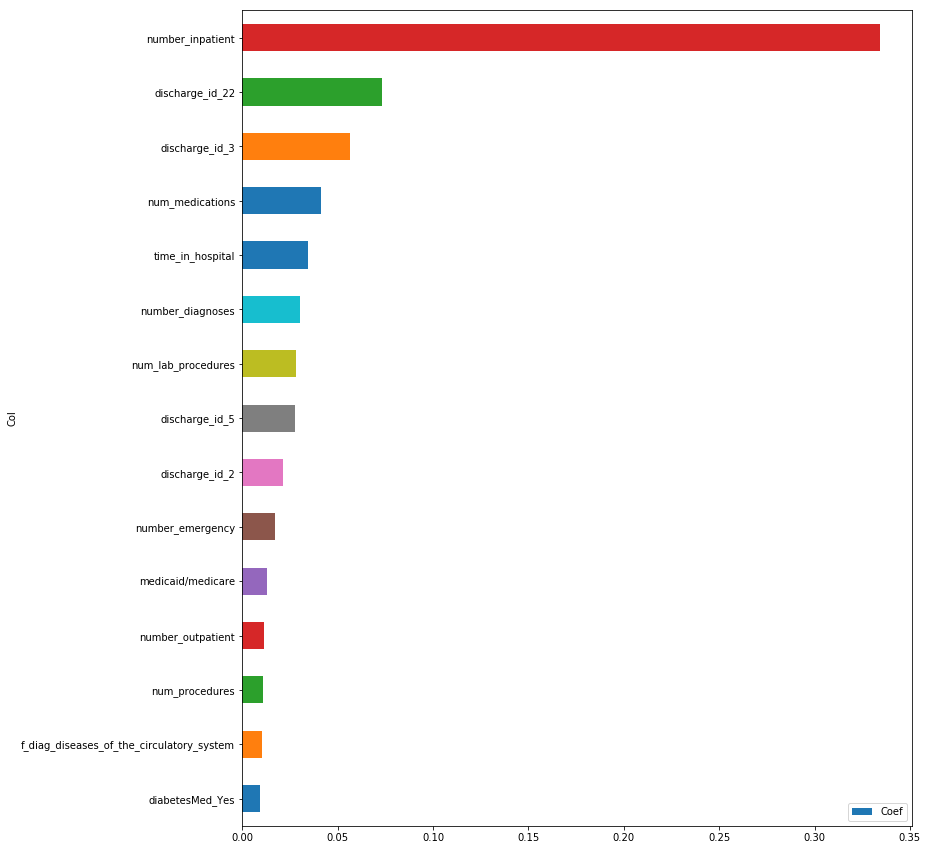

In [97]:
imp_coef.plot(kind = 'barh', x = 'Col', y = 'Coef',figsize=[12,15], sort_columns="Coef")

In [36]:
import pickle
gbmfile = 'gbm_withDummified&scale.sav'
pickle.dump(gbm, open(gbmfile, 'wb'))

In [ ]:
#====================XBM===============================

In [45]:
import xgboost as xgb

In [46]:
clf_xgb = xgb.XGBClassifier(objective = 'binary:logistic', class_weight = 'balanced')
param_dist = {'n_estimators': [1000,2000,3000],
              'learning_rate': [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
              'subsample': [0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
              'max_depth': [2,3,5],
              'max_feature' : ["sqrt", "auto"],
              "min_samples_split": [2,3,5,7],
              "min_samples_leaf": [2,3,5,7]
             }
numFolds = 3
clf = RandomizedSearchCV(clf_xgb, 
                         param_distributions = param_dist,
                         cv = numFolds,  
                         n_iter = 10,  
                         scoring = 'roc_auc')

In [47]:
X_train = X_train.rename({"max_glu_serum_>300":"max_glu_serum_greater300", "A1Cresult_>8":"A1Cresult_greater8"}, axis='columns')

In [48]:
X_train.columns = X_train.columns.str.replace(",", "")

In [49]:
X_train.columns = X_train.columns.str.replace(" ", "_")

In [50]:
X_train.columns = X_train.columns.str.replace("[", "")

In [51]:
X_train.columns = X_train.columns.str.replace("]", "")

In [52]:
X_test.columns = X_train.columns.str.replace(",", "")

In [53]:
X_test.columns = X_train.columns.str.replace(" ", "_")

In [54]:
X_test.columns = X_train.columns.str.replace("[", "")

In [55]:
X_test.columns = X_train.columns.str.replace("]", "")

In [56]:
clf.fit(X_train, y_train, sample_weight = {0:1, 1:9})

C:\Users\Leo\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:542: FutureWarning: From version 0.22, errors during fit will result in a cross validation score of NaN by default. Use error_score='raise' if you want an exception raised or error_score=np.nan to adopt the behavior from version 0.22.
  FutureWarning)


TypeError: fit() got an unexpected keyword argument 'class_weight'

In [ ]:
clf.best_params_

In [48]:
clf_xgb.set_params(max_features = "auto", learning_rate = 0.025, max_depth = 5, subsample= 0.618
                                   , n_estimators = 1000, min_samples_split = 7, min_samples_leaf = 5)

XGBClassifier(base_score=0.5, booster='gbtree', class_weight={0: 1, 1: 8},
       colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.025, max_delta_step=0, max_depth=5,
       max_features='auto', min_child_weight=1, min_samples_leaf=5,
       min_samples_split=7, missing=None, n_estimators=1000, n_jobs=1,
       nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.618)

In [49]:
clf_xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', class_weight={0: 1, 1: 8},
       colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.025, max_delta_step=0, max_depth=5,
       max_features='auto', min_child_weight=1, min_samples_leaf=5,
       min_samples_split=7, missing=None, n_estimators=1000, n_jobs=1,
       nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.618)

In [50]:
y_pred = clf_xgb.predict(X_test)
print('auc for xgb:', roc_auc_score(y_test,y_pred))

auc for xgb: 0.5117632433296412


In [51]:
print(confusion_matrix(y_test, clf_xgb.predict(X_test)))

[[22374    71]
 [ 2808    77]]


In [108]:
xgbfile = 'final_xgb.sav'
pickle.dump(clf_xgb, open(xgbfile, 'wb'))

In [52]:
xgb_coefs_df = pd.concat([pd.DataFrame(X_train.columns), pd.DataFrame(clf_xgb.feature_importances_)], axis = 1)
xgb_coefs_df.columns = ["Col", "Coef"]
xgb_coefs_df = xgb_coefs_df.sort_values(by="Coef", ascending = False)

In [53]:
xgb_coefs_df

,Col,Coef
1,num_lab_procedures,0.112661
3,num_medications,0.091520
0,time_in_hospital,0.056583
6,number_inpatient,0.041116
7,number_diagnoses,0.034587
2,num_procedures,0.030701
4,number_outpatient,0.023356
5,number_emergency,0.021102
12,clustering4,0.017643
11,clustering3,0.014224


In [99]:
new_data = data.merge(y.to_frame(), left_index = True, right_index=True)

In [100]:
new_data.groupby('target')['number_inpatient'].describe()

,count,mean,std,min,25%,50%,75%,max
target,,,,,,,,
0,74817.0,0.554406,1.113655,0.0,0.0,0.0,1.0,19.0
1,9615.0,1.213105,1.939761,0.0,0.0,0.0,2.0,21.0


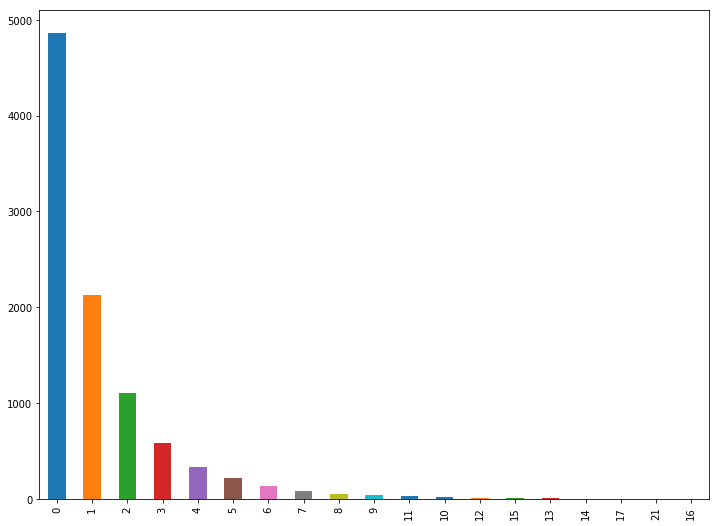

In [101]:
new_data[new_data['target'] == 1]['number_inpatient'].value_counts().plot.bar(figsize = (12,9))

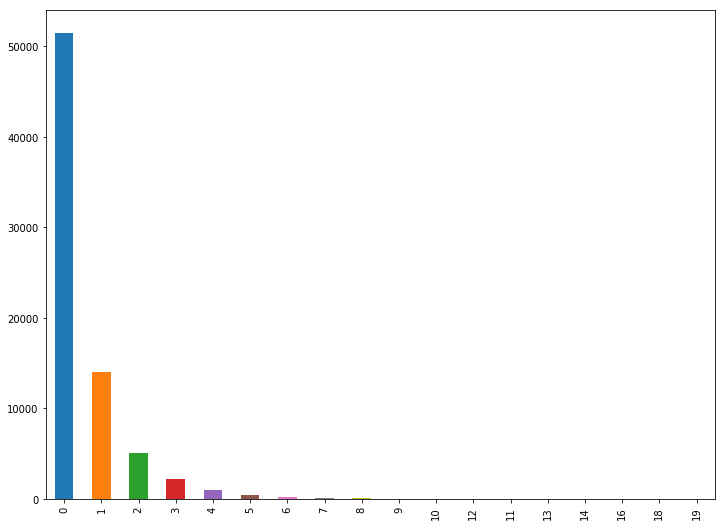

In [102]:
new_data[new_data['target'] == 0]['number_inpatient'].value_counts().plot.bar(figsize = (12,9))

In [103]:
new_data.groupby('target')['num_lab_procedures'].describe()

,count,mean,std,min,25%,50%,75%,max
target,,,,,,,,
0,74817.0,42.719435,19.633906,1.0,31.0,44.0,56.0,129.0
1,9615.0,44.088716,19.385321,1.0,33.0,45.0,58.0,132.0


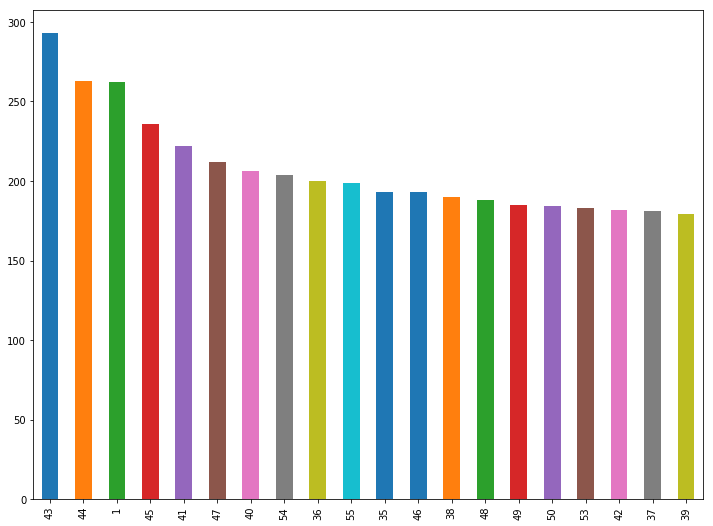

In [104]:
new_data[new_data['target'] == 1]['num_lab_procedures'].value_counts().nlargest(20).plot.bar(figsize = (12,9))

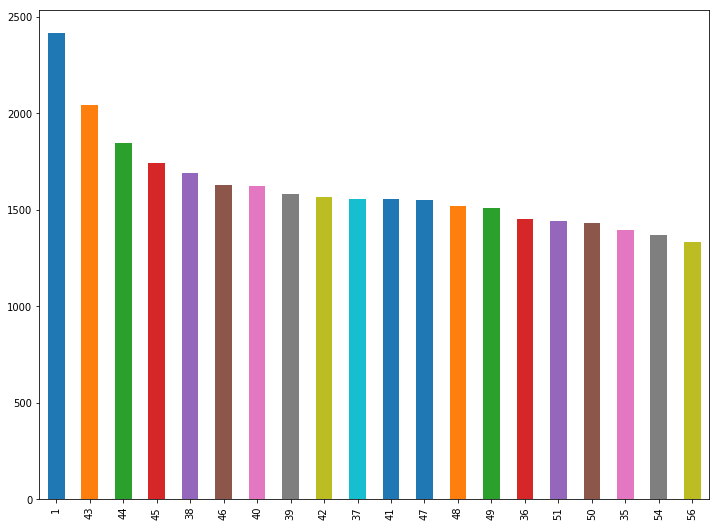

In [105]:
new_data[new_data['target'] == 0]['num_lab_procedures'].value_counts().nlargest(20).plot.bar(figsize = (12,9))

In [106]:
new_data.groupby('target')['num_procedures'].describe()

,count,mean,std,min,25%,50%,75%,max
target,,,,,,,,
0,74817.0,1.341700,1.713490,0.0,0.0,1.0,2.0,6.0
1,9615.0,1.285699,1.636075,0.0,0.0,1.0,2.0,6.0


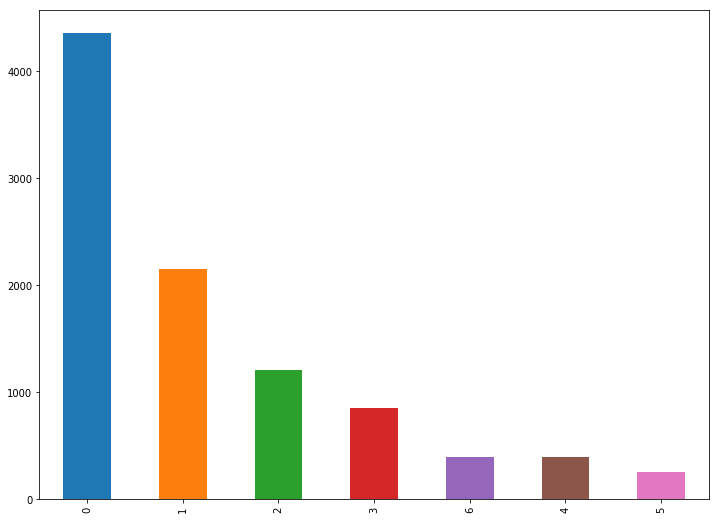

In [107]:
new_data[new_data['target'] == 1]['num_procedures'].value_counts().nlargest(20).plot.bar(figsize = (12,9))

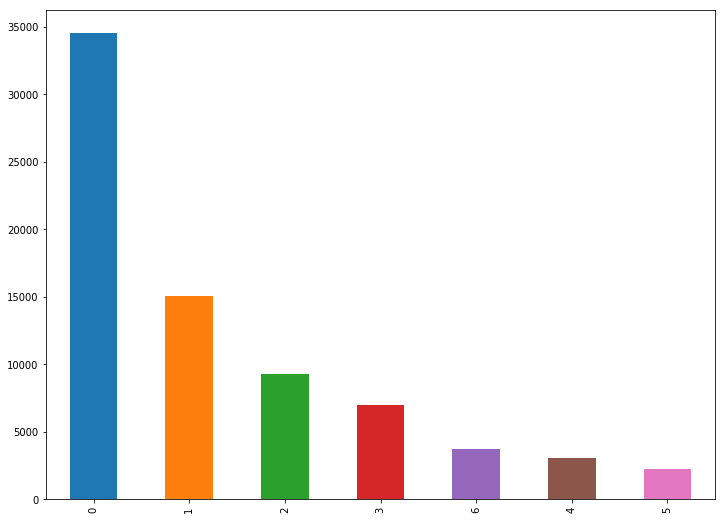

In [108]:
new_data[new_data['target'] == 0]['num_procedures'].value_counts().nlargest(20).plot.bar(figsize = (12,9))

In [109]:
new_data.groupby('target')['num_medications'].describe()

,count,mean,std,min,25%,50%,75%,max
target,,,,,,,,
0,74817.0,15.854966,8.102326,1.0,10.0,15.0,20.0,79.0
1,9615.0,16.910244,8.067968,1.0,11.0,16.0,21.0,72.0


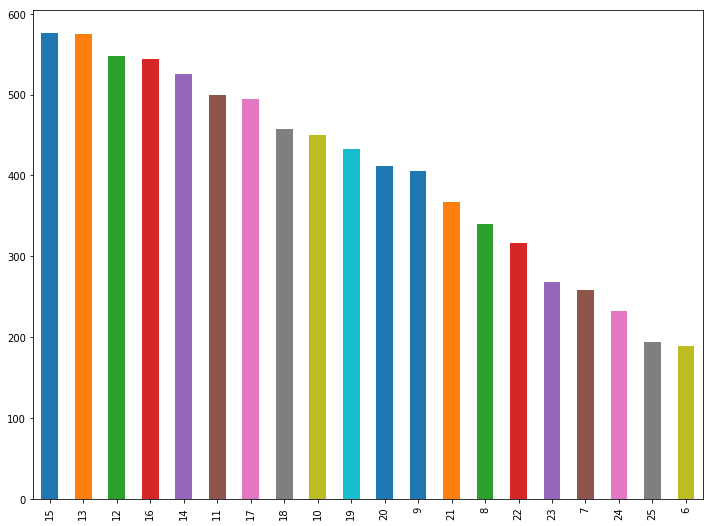

In [110]:
new_data[new_data['target'] == 1]['num_medications'].value_counts().nlargest(20).plot.bar(figsize = (12,9))

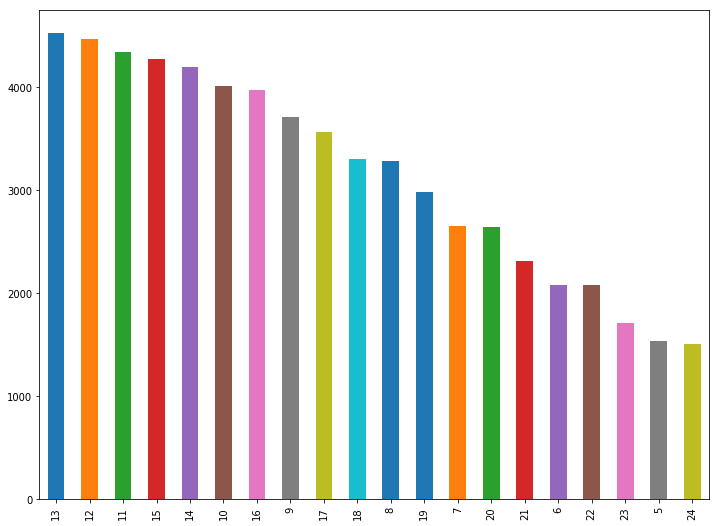

In [111]:
new_data[new_data['target'] == 0]['num_medications'].value_counts().nlargest(20).plot.bar(figsize = (12,9))

In [112]:
new_data.groupby('target')['number_outpatient'].describe()

,count,mean,std,min,25%,50%,75%,max
target,,,,,,,,
0,74817.0,0.363474,1.275749,0.0,0.0,0.0,0.0,42.0
1,9615.0,0.437337,1.299373,0.0,0.0,0.0,0.0,40.0


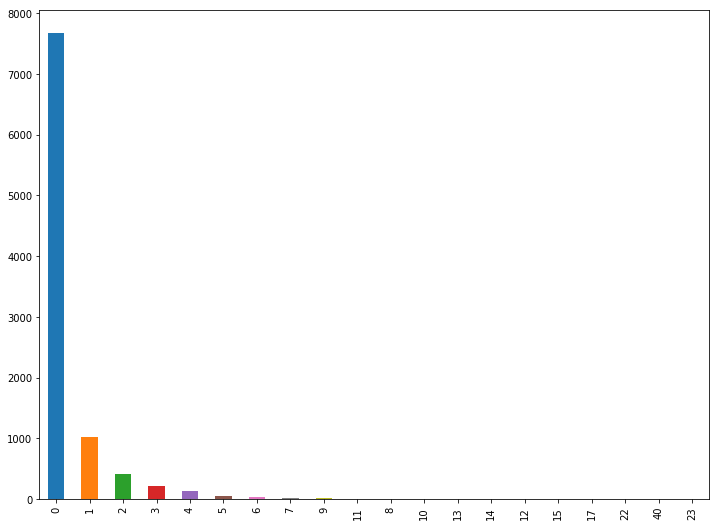

In [113]:
new_data[new_data['target'] == 1]['number_outpatient'].value_counts().nlargest(20).plot.bar(figsize = (12,9))

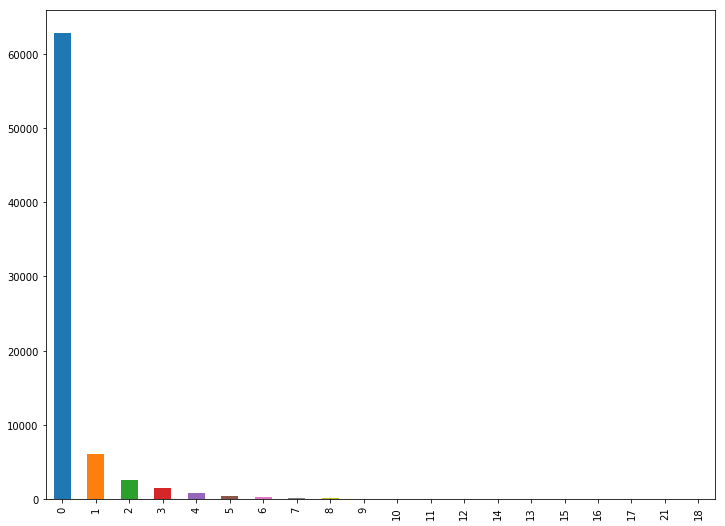

In [114]:
new_data[new_data['target'] == 0]['number_outpatient'].value_counts().nlargest(20).plot.bar(figsize = (12,9))

In [115]:
new_data.groupby('target')['number_emergency'].describe()

,count,mean,std,min,25%,50%,75%,max
target,,,,,,,,
0,74817.0,0.179625,0.864458,0.0,0.0,0.0,0.0,76.0
1,9615.0,0.351846,1.360178,0.0,0.0,0.0,0.0,64.0


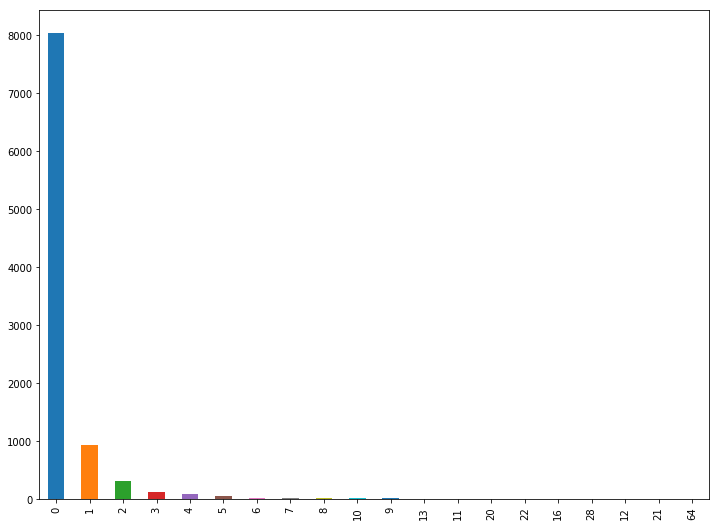

In [116]:
new_data[new_data['target'] == 1]['number_emergency'].value_counts().nlargest(20).plot.bar(figsize = (12,9))

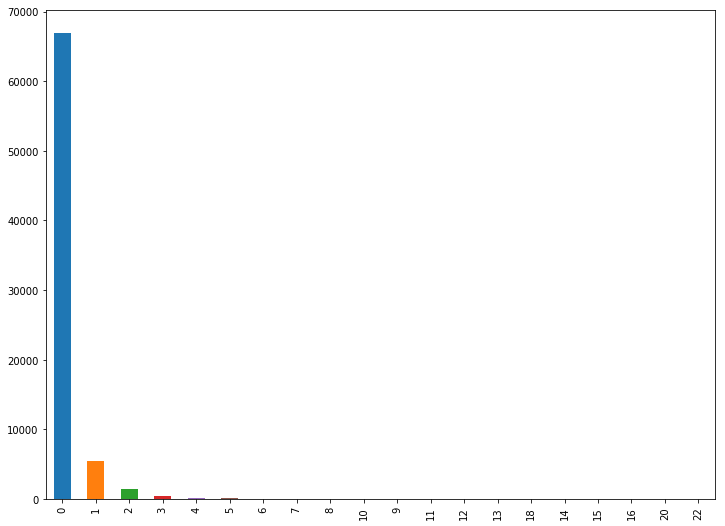

In [117]:
new_data[new_data['target'] == 0]['number_emergency'].value_counts().nlargest(20).plot.bar(figsize = (12,9))

In [118]:
new_data.groupby('target')['number_diagnoses'].describe()

,count,mean,std,min,25%,50%,75%,max
target,,,,,,,,
0,74817.0,7.365425,1.959878,1.0,6.0,8.0,9.0,16.0
1,9615.0,7.693188,1.772326,1.0,7.0,9.0,9.0,16.0


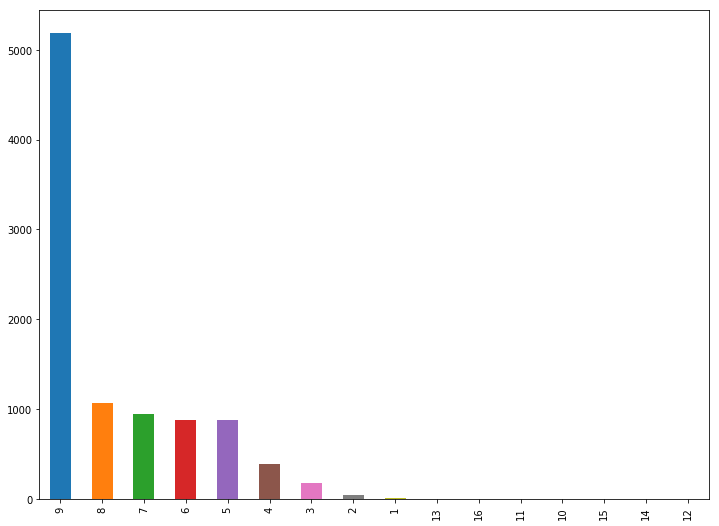

In [119]:
new_data[new_data['target'] == 1]['number_diagnoses'].value_counts().nlargest(20).plot.bar(figsize = (12,9))

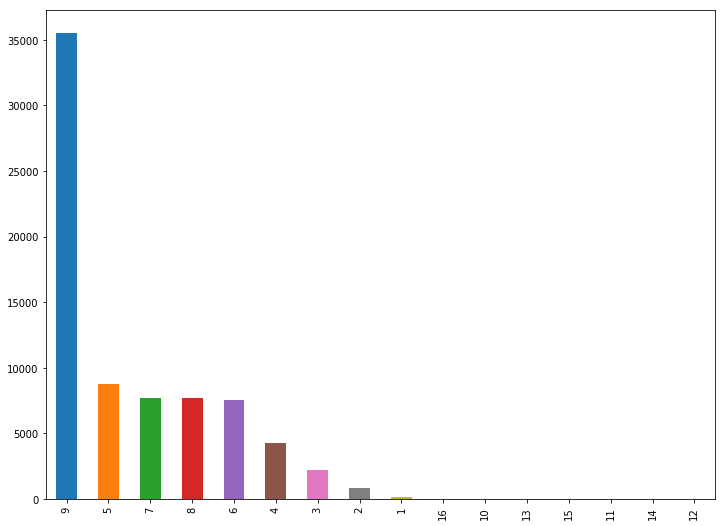

In [120]:
new_data[new_data['target'] == 0]['number_diagnoses'].value_counts().nlargest(20).plot.bar(figsize = (12,9))

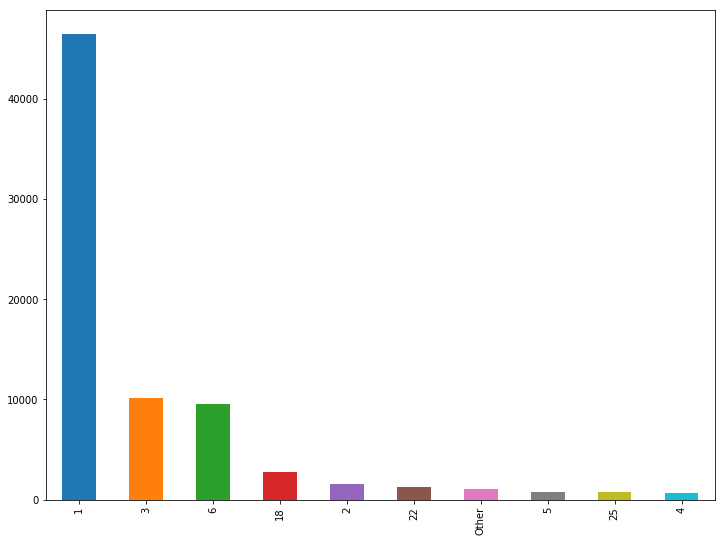

In [123]:
new_data[new_data['target'] == 0]['discharge_id'].value_counts().nlargest(20).plot.bar(figsize = (12,9))

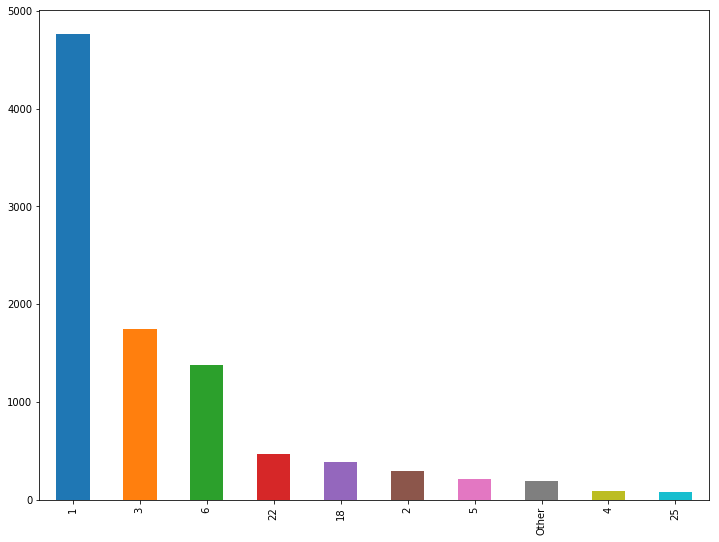

In [124]:
new_data[new_data['target'] == 1]['discharge_id'].value_counts().nlargest(20).plot.bar(figsize = (12,9))

In [57]:
final_gbm = open("final_gbm.sav","rb")
final_GBM = pickle.load(final_gbm)

In [58]:
final_GBM.get_params

<bound method BaseEstimator.get_params of GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.025, loss='deviance', max_depth=2,
              max_features='auto', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=5, min_samples_split=3,
              min_weight_fraction_leaf=0.0, n_estimators=500,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=0.618, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)>

In [59]:
final_GBM.fit(X_train, y_train, sample_weight = weight)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.025, loss='deviance', max_depth=2,
              max_features='auto', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=5, min_samples_split=3,
              min_weight_fraction_leaf=0.0, n_estimators=500,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=0.618, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [65]:
print("auc train score: ", roc_auc_score(y_train, final_GBM.predict_proba(X_train)[:,1]))
print("auc test score: ",roc_auc_score(y_test, final_GBM.predict_proba(X_test)[:,1]))
print("recall train score: ",recall_score(y_train, final_GBM.predict(X_train)))
print("recall test score: ",recall_score(y_test, final_GBM.predict(X_test)))
print("precision train score: ", precision_score(y_train, final_GBM.predict(X_train)))
print("precision test score: ",precision_score(y_test, final_GBM.predict(X_test)))
print("accuracy train score: ",accuracy_score(y_train, final_GBM.predict(X_train)))
print("accuracy test score: ",accuracy_score(y_test, final_GBM.predict(X_test)))
print(confusion_matrix(y_test, final_GBM.predict(X_test)))

auc train score:  0.6809424568599375
auc test score:  0.6645937131899158
recall train score:  0.6650817236255572
recall test score:  0.6332755632582322
precision train score:  0.17295208655332303
precision test score:  0.16697130323524037
accuracy train score:  0.5997089776995702
accuracy test score:  0.5983813659692064
[[13330  9115]
 [ 1058  1827]]


In [61]:
final_xgb = open("final_xgb.sav","rb")
final_XGB = pickle.load(final_xgb)

In [62]:
final_XGB.get_params

<bound method BaseEstimator.get_params of GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.025, loss='deviance', max_depth=2,
              max_features='auto', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=5, min_samples_split=3,
              min_weight_fraction_leaf=0.0, n_estimators=500,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=0.618, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)>

In [63]:
final_XGB.fit(X_train, y_train, sample_weight = weight)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.05, max_delta_step=0,
       max_depth=2, max_features='auto', min_child_weight=1,
       min_samples_leaf=2, min_samples_split=7, missing=nan,
       n_estimators=1000, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [66]:
print("auc train score: ", roc_auc_score(y_train, final_XGB.predict_proba(X_train)[:,1]))
print("auc test score: ",roc_auc_score(y_test, final_XGB.predict_proba(X_test)[:,1]))
print("recall train score: ",recall_score(y_train, final_XGB.predict(X_train)))
print("recall test score: ",recall_score(y_test, final_XGB.predict(X_test)))
print("precision train score: ", precision_score(y_train, final_XGB.predict(X_train)))
print("precision test score: ",precision_score(y_test, final_XGB.predict(X_test)))
print("accuracy train score: ",accuracy_score(y_train, final_XGB.predict(X_train)))
print("accuracy test score: ",accuracy_score(y_test, final_XGB.predict(X_test)))
print(confusion_matrix(y_test, final_XGB.predict(X_test)))

auc train score:  0.7022709113532191
auc test score:  0.66599612455326
recall train score:  0.67444279346211
recall test score:  0.6336221837088388
precision train score:  0.18085106382978725
precision test score:  0.17117707650529077
accuracy train score:  0.6150722479780718
accuracy test score:  0.6088432688511646
[[13594  8851]
 [ 1057  1828]]


In [126]:
new_data.dtypes

race                      object
gender                    object
age                       object
admission_type_id         object
time_in_hospital           int64
num_lab_procedures         int64
num_procedures             int64
num_medications            int64
number_outpatient          int64
number_emergency           int64
number_inpatient           int64
number_diagnoses           int64
max_glu_serum             object
A1Cresult                 object
metformin                 object
repaglinide               object
nateglinide               object
chlorpropamide            object
acetohexamide             object
glipizide                 object
glyburide                 object
tolbutamide               object
pioglitazone              object
rosiglitazone             object
acarbose                  object
miglitol                  object
citoglipton               object
insulin                   object
metformin-pioglitazone    object
change                    object
diabetesMe

In [137]:
risk_dataset = dummied_features.copy()

In [138]:
risk_dataset['prob'] = gbm.predict_proba(dummied_features)[:,1]

In [139]:
risk_dataset['prob'] = risk_dataset['prob']*100

In [140]:
risk_dataset['prob'] = risk_dataset['prob'].astype(int)

In [156]:
risk_dataset = risk_dataset.merge(y.to_frame(), left_index = True, right_index=True)

In [160]:
risk_dataset

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,self_pay,medicaid/medicare,...,discharge_id_Other,admission_id_17,admission_id_2,admission_id_4,admission_id_5,admission_id_6,admission_id_7,admission_id_Other,prob,target
0,10,45,1,23,0,0,2,9,0,0,...,0,0,0,0,0,0,1,0,42,0
1,5,39,4,17,0,0,0,9,0,0,...,0,0,0,0,0,0,1,0,35,0
2,3,47,0,13,0,0,5,9,0,0,...,0,0,0,0,0,0,1,0,73,0
3,5,61,0,14,0,0,0,9,0,0,...,0,0,0,0,0,0,1,0,53,0
4,10,76,1,23,0,0,0,9,0,1,...,0,0,0,0,0,0,1,0,33,0
5,13,43,6,39,0,0,0,9,1,0,...,0,0,0,0,0,0,0,0,49,0
6,2,39,1,13,0,0,0,5,0,0,...,0,0,0,0,0,0,0,0,50,0
7,2,51,0,8,0,0,0,9,0,0,...,0,0,0,0,0,0,1,0,30,0
8,4,9,0,13,0,0,0,8,0,0,...,0,0,0,0,0,0,1,0,44,0
9,4,39,2,28,1,0,3,8,0,1,...,0,0,0,0,0,0,0,0,57,1


In [171]:
risk_dataset['target'][risk_dataset['prob'] == 93].value_counts()

Series([], Name: target, dtype: int64)

In [189]:
risk_dataset['target'][risk_dataset['prob'] > 80].value_counts()

TypeError: '<' not supported between instances of 'int' and 'str'

In [166]:
risk_dataset['target'][risk_dataset['prob'] > 70].value_counts()

0    1443
1     713
Name: target, dtype: int64

In [167]:
risk_dataset['target'][risk_dataset['prob'] > 60].value_counts()

0    6795
1    1982
Name: target, dtype: int64

In [188]:
for i in range(80, 92):
    print("risk", i)
    print(risk_dataset['target'][risk_dataset['prob'] > i].value_counts())
    print("ratio",risk_dataset['target'][risk_dataset['prob'] > i].value_counts()[1]/sum(risk_dataset['target'][risk_dataset['prob'] > i].value_counts()))

risk 80
0    159
1    133
Name: target, dtype: int64
ratio 0.4554794520547945
risk 81
0    117
1    105
Name: target, dtype: int64
ratio 0.47297297297297297
risk 82
0    86
1    76
Name: target, dtype: int64
ratio 0.4691358024691358
risk 83
1    60
0    60
Name: target, dtype: int64
ratio 0.5
risk 84
1    48
0    45
Name: target, dtype: int64
ratio 0.5161290322580645
risk 85
1    34
0    31
Name: target, dtype: int64
ratio 0.5230769230769231
risk 86
1    22
0    19
Name: target, dtype: int64
ratio 0.5365853658536586
risk 87
1    18
0    15
Name: target, dtype: int64
ratio 0.5454545454545454
risk 88
0    12
1    11
Name: target, dtype: int64
ratio 0.4782608695652174
risk 89
0    10
1     6
Name: target, dtype: int64
ratio 0.375
risk 90
0    6
1    5
Name: target, dtype: int64
ratio 0.45454545454545453
risk 91
0    4
1    3
Name: target, dtype: int64
ratio 0.42857142857142855
